<a href="https://colab.research.google.com/github/tranle1411/Default_Risk_P2P_Predictor/blob/main/Default_Risk_P2P_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Pre-processing

In [ ]:
from IPython import get_ipython
get_ipython().magic('reset -sf')
import pandas as pd #for data analysis#
import numpy as np #for data analysis#
import matplotlib.pyplot as plt #for visualization#
import seaborn as sns #for better looking visualization
import scipy.stats as stats
import statsmodels.api as sm #library for statistics analysis#
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.stats.anova import anova_lm
!pip install ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
!pip install ml_metrics

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.4/891.4 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=774fd24fd93162d523ba5c06dc01fde295c02310706b5eb34d45bd5355c53aaf
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')
import os

# List files and directories in the specified path
#os.listdir('/content/drive/MyDrive/Group Assignment 2 | Group 1') #adjust the address to your own
os.listdir('/content/drive/MyDrive/BUS310 - Group Assignment')

# Correct path to your CSV file
#file_path = '/content/drive/MyDrive/Group Assignment 2 | Group 1/cleaned_p2p_2007_to_2018Q4.csv'
file_path = '/content/drive/MyDrive/BUS310 - Group Assignment/cleaned_p2p_2007_to_2018Q4.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

#Display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the DataFrame to confirm successful loading
df.head()

Mounted at /content/drive


<ipython-input-3-7d68ee7fa55a>:15: DtypeWarning: Columns (45,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,66624733,18000,18000,18000.0,60 months,19.48,471.70,E,E2,Software Manager,7 years,RENT,150000.0,Not Verified,Dec-15,Charged Off,n,debt_consolidation,Debt consolidation,916xx,CA,9.39,0,Jun-05,665,669,1,NaN,18,1,14052,40.7,27,w,0.0,0.0,9452.74,9452.74,3481.86,4351.98,0.00,1618.90,291.4020,May-17,471.70,NaN,Nov-17,584,580,0,NaN,1,Individual,NaN,NaN,NaN,0,60,36247,2.0,2.0,1.0,3.0,2.0,22195.0,71.0,2.0,4.0,1271.0,55.0,34500,2.0,1.0,2.0,7,2014.0,5128.0,51.3,0,0,115.0,112,1,1,2,9.0,NaN,2.0,NaN,0,6,13,7,8,6,16,19.0,13,18,0.0,0,0,3,100.0,14.3,1,0,65819,36247,10300,31319,N,Cash,N
1,67849662,4225,4225,4225.0,36 months,14.85,146.16,C,C5,mechanic,5 years,RENT,35000.0,Source Verified,Dec-15,Charged Off,n,debt_consolidation,Debt consolidation,672xx,KS,15.22,2,Jul-11,725,729,0,18.0,6,0,1058,24.6,6,w,0.0,0.0,2558.87,2558.87,1536.90,653.60,0.00,368.37,66.3066,Apr-17,146.16,NaN,Dec-17,499,0,0,NaN,1,Individual,NaN,NaN,NaN,0,0,4888,0.0,1.0,0.0,0.0,47.0,3830.0,22.0,0.0,0.0,367.0,22.0,4300,0.0,0.0,0.0,0,815.0,2233.0,14.1,0,0,47.0,53,26,26,0,26.0,NaN,14.0,18.0,0,1,2,3,3,1,5,5.0,2,6,0.0,0,0,0,66.7,0.0,0,0,21822,4888,2600,17522,N,Cash,N
2,67715283,16000,16000,16000.0,36 months,12.88,538.18,C,C2,"Owner, Fee Appraiser",10+ years,MORTGAGE,65000.0,Not Verified,Dec-15,Charged Off,n,small_business,Business,354xx,AL,18.96,0,Dec-85,675,679,0,33.0,7,1,5157,54.3,20,w,0.0,0.0,17396.63,17396.63,13833.12,3402.05,161.46,0.00,0.0000,Nov-18,565.09,NaN,Mar-19,629,625,0,55.0,1,Individual,NaN,NaN,NaN,0,1830,39781,2.0,2.0,0.0,0.0,27.0,34624.0,68.0,2.0,2.0,739.0,64.0,9500,0.0,5.0,0.0,2,5683.0,3684.0,21.6,0,0,256.0,360,1,1,0,1.0,33.0,14.0,33.0,1,3,5,3,3,12,5,7.0,5,7,0.0,0,0,2,80.0,0.0,0,1,80999,39781,4700,71499,N,Cash,N
3,68341789,24250,24250,24250.0,60 months,24.24,701.01,F,F3,hvac technician,4 years,MORTGAGE,75000.0,Not Verified,Dec-15,Charged Off,n,debt_consolidation,NaN,114xx,NY,20.84,0,Apr-07,660,664,0,NaN,18,0,24799,65.3,21,w,0.0,0.0,4124.42,4124.42,1332.69,2791.73,0.00,0.00,0.0000,Jul-16,701.01,NaN,Mar-18,499,0,0,NaN,1,Individual,NaN,NaN,NaN,0,0,320098,2.0,1.0,0.0,1.0,14.0,13676.0,75.0,2.0,10.0,3138.0,61.0,38000,1.0,1.0,3.0,13,17783.0,9044.0,68.9,0,0,93.0,104,2,2,2,2.0,NaN,7.0,NaN,0,10,12,11,12,2,15,16.0,12,18,0.0,0,0,3,100.0,63.6,0,0,344960,38475,29100,18300,N,Cash,N
4,68415473,25000,25000,25000.0,60 months,13.99,581.58,C,C4,Executiv

##Understand the data

###Keep observations that are “Charged-off”, “Default”, and “Fully Paid”

In [ ]:
print("Number of observations before:", len(df))
df = df[df['loan_status'].isin(['Charged Off', 'Fully Paid', 'Default'])]
print("Number of observations after:", len(df))

Number of observations before: 1044489
Number of observations after: 611803


###create loan_status_dummy

In [ ]:
df['loan_status_dummy'] = df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)
print(df['loan_status_dummy'].describe())

count    611803.000000
mean          0.211192
std           0.408155
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: loan_status_dummy, dtype: float64


Questions:

o	What is the overall Charged-off (default) rate?

o	How many years of data in this dataset?

o	How many loans are there for each year? What about the default rate for each year?

#2.	Exploratory Data Analysis

##2.1 Exploring important variables

###Create income_cat

In [ ]:
def categorize_income(annual_income):
    if annual_income <= 20000:
        return 'Low Income'
    elif 20000 < annual_income <= 80000:
        return 'Medium Income'
    else:
        return 'High Income'

df['Income_cat'] = df['annual_inc'].apply(categorize_income)

In [ ]:
df['Income_cat'] = pd.cut(df['annual_inc'], bins=[0, 20000, 80000, float('inf')], labels=['Low Income', 'Medium Income', 'High Income'])
df.Income_cat.value_counts()

,count
Income_cat,
Medium Income,400105
High Income,201038
Low Income,10447


###Create DTI_cat

In [ ]:
df.dti.describe()

,dti
count,611585.000000
mean,18.952937
std,11.847202
min,-1.000000
25%,12.170000
50%,18.180000
75%,24.960000
max,999.000000


In [ ]:
df = df[df['dti'] != -1]

In [ ]:
df['DTI_cat'] = pd.cut(df['dti'], bins=[0, 28, 40, float('inf')], labels=['Good', 'Fair', 'Bad'])
df.DTI_cat.value_counts()

<ipython-input-10-c13ed306d740>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DTI_cat'] = pd.cut(df['dti'], bins=[0, 28, 40, float('inf')], labels=['Good', 'Fair', 'Bad'])


,count
DTI_cat,
Good,510257
Fair,97119
Bad,3931


###Create FICO_cat

In [ ]:
fico_variables = [col for col in df.columns if 'fico' in col.lower()]
df[fico_variables]

,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low
0,665,669,584,580
1,725,729,499,0
2,675,679,629,625
3,660,664,499,0
4,730,734,604,600
...,...,...,...,...
1027274,675,679,709,705
1027275,665,669,669,665
1027276,710,714,704,700
1027277,715,719,774,770


In [ ]:
df['FICO_cat'] = pd.cut(df['fico_range_low'], bins=[0, 579, 669, 739, float('inf')], labels=['Poor', 'Fair', 'Good', 'Very Good']) #There is no obs with 'Poor' FICO score
df.FICO_cat.value_counts()

,count
FICO_cat,
Good,433529
Fair,113900
Very Good,64373
Poor,0


###Bar chart showing rates for different income lebls

income_cat graph

In [ ]:
df_subset = df.loc[df['Income_cat'] == 'Low Income', ['Income_cat', 'loan_status_dummy']]
df_subset.loan_status_dummy.value_counts()

,count
loan_status_dummy,
0,7739
1,2708


<ipython-input-14-f7cbfa2a1112>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dti_stats = df.groupby('Income_cat').agg({'loan_status_dummy': 'mean', 'int_rate': 'mean'})


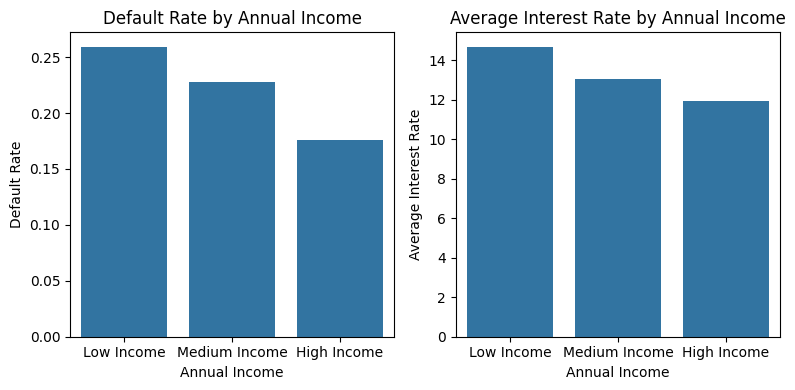

In [ ]:
# Group data by income_cat and calculate the default rate and average interest rate
dti_stats = df.groupby('Income_cat').agg({'loan_status_dummy': 'mean', 'int_rate': 'mean'})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot the default rate by income_cat
sns.barplot(x=dti_stats.index, y=dti_stats['loan_status_dummy'], ax=axes[0])
axes[0].set_title('Default Rate by Annual Income')
axes[0].set_xlabel('Annual Income')
axes[0].set_ylabel('Default Rate')

# Plot the average interest rate by income_cat
sns.barplot(x=dti_stats.index, y=dti_stats['int_rate'], ax=axes[1])
axes[1].set_title('Average Interest Rate by Annual Income')
axes[1].set_xlabel('Annual Income')
axes[1].set_ylabel('Average Interest Rate')

plt.tight_layout()
plt.show()

###Four similar charts


DTI_cat graph

In [ ]:
df.dti.describe()

,dti
count,611584.000000
mean,18.952970
std,11.847184
min,0.000000
25%,12.170000
50%,18.180000
75%,24.960000
max,999.000000


In [ ]:
df.DTI_cat.value_counts()

,count
DTI_cat,
Good,510257
Fair,97119
Bad,3931


In [ ]:
df_subset = df.loc[df['DTI_cat'] == 'Bad', ['dti', 'loan_status_dummy']]
df_subset.loan_status_dummy.value_counts()

,count
loan_status_dummy,
0,2717
1,1214


<ipython-input-18-242341641024>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dti_stats = df.groupby('DTI_cat').agg({'loan_status_dummy': 'mean', 'int_rate': 'mean'})


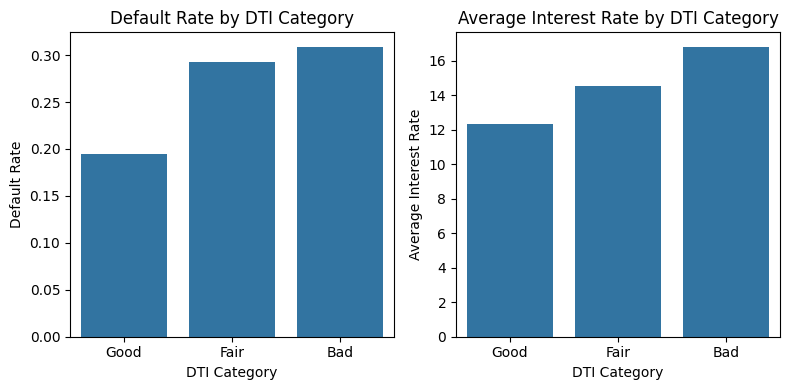

In [ ]:
# Group data by DTI_cat and calculate the default rate and average interest rate
dti_stats = df.groupby('DTI_cat').agg({'loan_status_dummy': 'mean', 'int_rate': 'mean'})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot the default rate by DTI_cat
sns.barplot(x=dti_stats.index, y=dti_stats['loan_status_dummy'], ax=axes[0])
axes[0].set_title('Default Rate by DTI Category')
axes[0].set_xlabel('DTI Category')
axes[0].set_ylabel('Default Rate')

# Plot the average interest rate by DTI_cat
sns.barplot(x=dti_stats.index, y=dti_stats['int_rate'], ax=axes[1])
axes[1].set_title('Average Interest Rate by DTI Category')
axes[1].set_xlabel('DTI Category')
axes[1].set_ylabel('Average Interest Rate')

plt.tight_layout()
plt.show()

FICO_cat graph

<ipython-input-19-39248ad1c4e3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dti_stats = df.groupby('FICO_cat').agg({'loan_status_dummy': 'mean', 'int_rate': 'mean'})


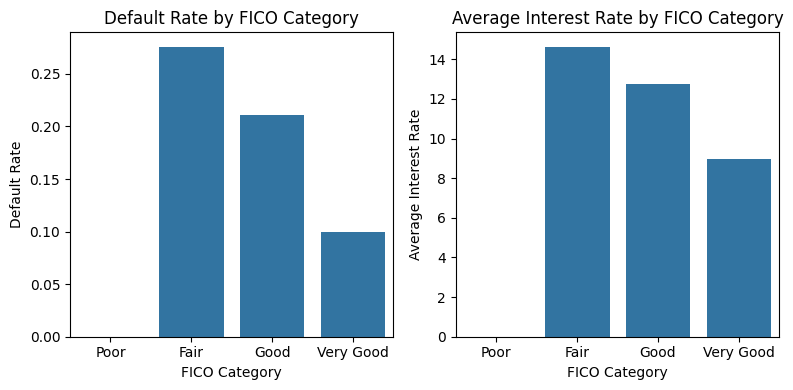

In [ ]:
# Group data by FICO_cat and calculate the default rate and average interest rate
dti_stats = df.groupby('FICO_cat').agg({'loan_status_dummy': 'mean', 'int_rate': 'mean'})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot the default rate by FICO_cat
sns.barplot(x=dti_stats.index, y=dti_stats['loan_status_dummy'], ax=axes[0])
axes[0].set_title('Default Rate by FICO Category')
axes[0].set_xlabel('FICO Category')
axes[0].set_ylabel('Default Rate')

# Plot the average interest rate by FICO_cat
sns.barplot(x=dti_stats.index, y=dti_stats['int_rate'], ax=axes[1])
axes[1].set_title('Average Interest Rate by FICO Category')
axes[1].set_xlabel('FICO Category')
axes[1].set_ylabel('Average Interest Rate')

plt.tight_layout()
plt.show()

Home Ownership graph

In [ ]:
print(df.home_ownership.value_counts())
df_subset = df[df['home_ownership'].isin(['NONE', 'ANY'])]
df_subset.loan_status_dummy.value_counts()

home_ownership
MORTGAGE    298516
RENT        243401
OWN          69868
ANY             15
NONE             2
Name: count, dtype: int64


,count
loan_status_dummy,
0,16
1,1


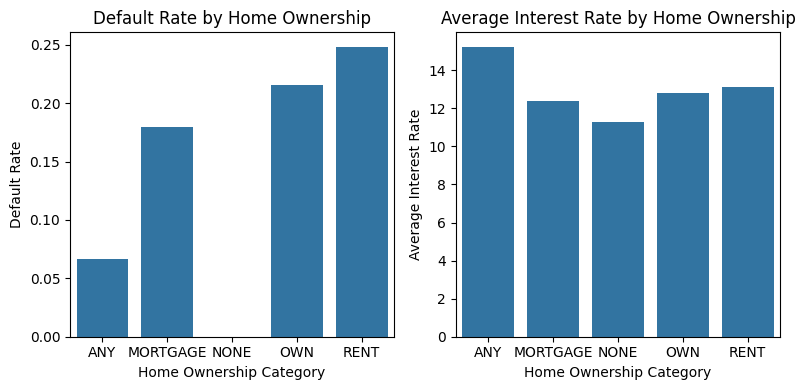

In [ ]:
# Group data by home_ownership and calculate the default rate and average interest rate
dti_stats = df.groupby('home_ownership').agg({'loan_status_dummy': 'mean', 'int_rate': 'mean'})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot the default rate by home_ownership
sns.barplot(x=dti_stats.index, y=dti_stats['loan_status_dummy'], ax=axes[0])
axes[0].set_title('Default Rate by Home Ownership')
axes[0].set_xlabel('Home Ownership Category')
axes[0].set_ylabel('Default Rate')

# Plot the average interest rate by home_ownership
sns.barplot(x=dti_stats.index, y=dti_stats['int_rate'], ax=axes[1])
axes[1].set_title('Average Interest Rate by Home Ownership')
axes[1].set_xlabel('Home Ownership Category')
axes[1].set_ylabel('Average Interest Rate')

plt.tight_layout()
plt.show()

purpose graph

In [ ]:
df.purpose.value_counts()

,count
purpose,
debt_consolidation,354489
credit_card,136931
home_improvement,41686
other,34950
major_purchase,12963
medical,7089
car,6033
small_business,5605
vacation,4386


<ipython-input-23-3b913754f473>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
<ipython-input-23-3b913754f473>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


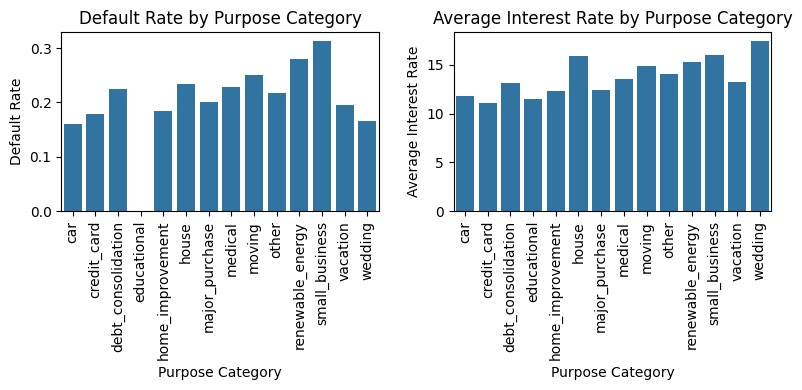

In [ ]:
# Group data by purpose and calculate the default rate and average interest rate
dti_stats = df.groupby('purpose').agg({'loan_status_dummy': 'mean', 'int_rate': 'mean'})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot the default rate by purpose
sns.barplot(x=dti_stats.index, y=dti_stats['loan_status_dummy'], ax=axes[0])
axes[0].set_title('Default Rate by Purpose Category')
axes[0].set_xlabel('Purpose Category')
axes[0].set_ylabel('Default Rate')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Plot the average interest rate by purpose
sns.barplot(x=dti_stats.index, y=dti_stats['int_rate'], ax=axes[1])
axes[1].set_title('Average Interest Rate by Purpose Category')
axes[1].set_xlabel('Purpose Category')
axes[1].set_ylabel('Average Interest Rate')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

##2.2 Individual Graphs

###Adjust emp_length (Tran)

In [ ]:
mean_loan_status_dummy = df[df['emp_length'] == '2 years']['loan_status_dummy'].mean()
mean_loan_status_dummy

0.21206026541203513

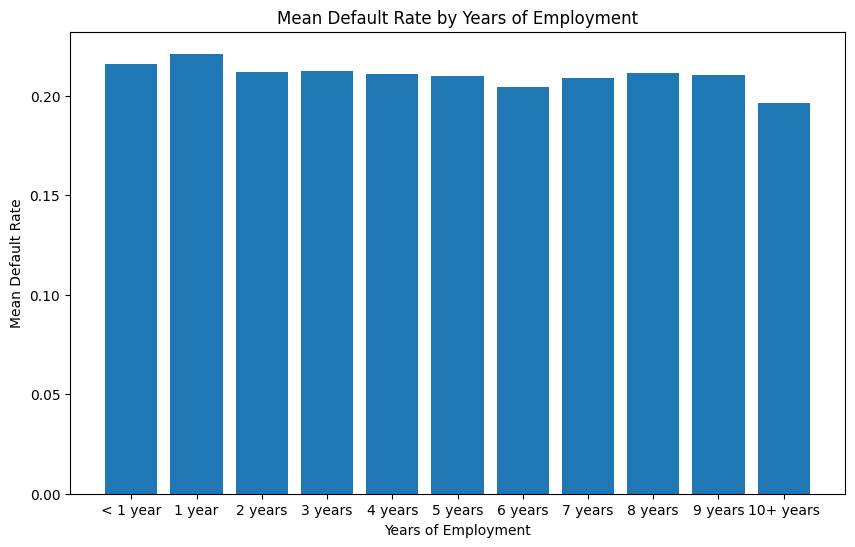

In [ ]:
# Group the data by 'grade' and calculate the mean of 'loan_status_dummy'
emp_length_stats = df.groupby('emp_length')['loan_status_dummy'].mean()

# Adjust indexes
emp_length_stats = emp_length_stats.reindex(['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])

# Identify emp_length categories with mean loan_status_dummy = 0
emp_length_to_drop = emp_length_stats[emp_length_stats == 0].index

# Filter the DataFrame to exclude those categories
emp_length_stats.drop(emp_length_to_drop, inplace=True)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(emp_length_stats.index, emp_length_stats.values)
plt.xticks(emp_length_stats.index)
plt.xlabel('Years of Employment')
plt.ylabel('Mean Default Rate')
plt.title('Mean Default Rate by Years of Employment')
plt.show()

###Int_rate and Grade (Sota)

In [ ]:
grade_df = df[['int_rate', 'grade', 'sub_grade', 'loan_status', 'loan_status_dummy']]
grade_stats = grade_df.groupby('grade')[['int_rate', 'loan_status_dummy']].mean()
grade_default_df = pd.DataFrame({'grade': grade_stats.index, 'int_rate': grade_stats['int_rate'], 'default_rate': grade_stats['loan_status_dummy']}).reset_index(drop=True)
grade_default_df

,grade,int_rate,default_rate
0,A,6.878347,0.061474
1,B,10.152467,0.142157
2,C,13.580959,0.238441
3,D,17.402695,0.332438
4,E,20.629512,0.419711
5,F,25.006262,0.502716
6,G,28.627511,0.536922


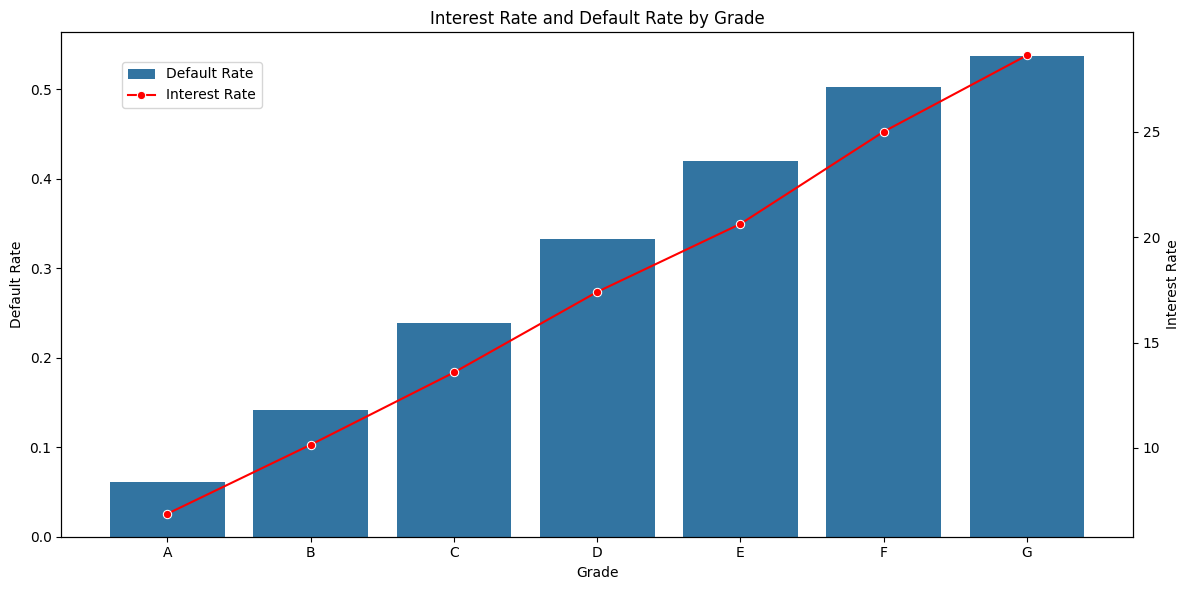

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

bar_plot = sns.barplot( x='grade', y='default_rate', data=grade_default_df, ax=ax1, label='Default Rate')
ax1.set_xlabel('Grade')
ax1.set_ylabel('Default Rate')
ax1.grid(False)
ax1.legend().remove()

ax2 = ax1.twinx()

line_plot = sns.lineplot(x='grade', y='int_rate', data=grade_default_df, color='red', marker='o', ax=ax2, label='Interest Rate')
ax2.set_ylabel('Interest Rate')
ax2.grid(False)
ax2.legend().remove()

plt.title('Interest Rate and Default Rate by Grade')

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

fig.legend(handles1 + handles2, labels1 + labels2, bbox_to_anchor=(0.1, 0.9) , loc='upper left')
fig.tight_layout()
plt.show()

###Debt Settlement Flag (Quan)


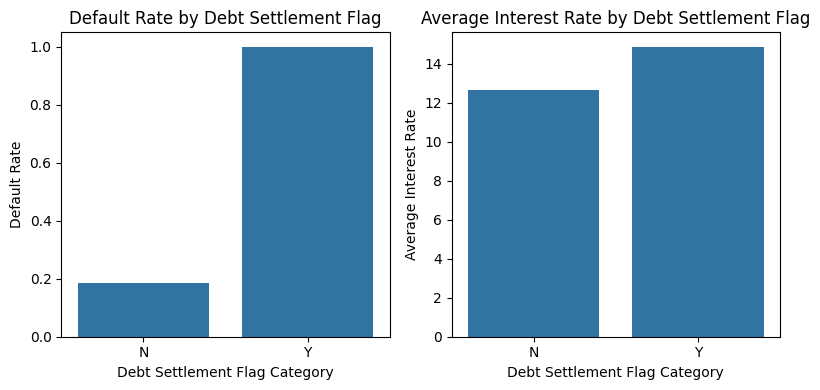

In [ ]:
# Group data by debt_settlement_flag and calculate the default rate and average interest rate
dti_stats = df.groupby('debt_settlement_flag').agg({'loan_status_dummy': 'mean', 'int_rate': 'mean'})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot the default rate by debt_settlement_flag
sns.barplot(x=dti_stats.index, y=dti_stats['loan_status_dummy'], ax=axes[0])
axes[0].set_title('Default Rate by Debt Settlement Flag')
axes[0].set_xlabel('Debt Settlement Flag Category')
axes[0].set_ylabel('Default Rate')

# Plot the average interest rate by debt_settlement_flag
sns.barplot(x=dti_stats.index, y=dti_stats['int_rate'], ax=axes[1])
axes[1].set_title('Average Interest Rate by Debt Settlement Flag')
axes[1].set_xlabel('Debt Settlement Flag Category')
axes[1].set_ylabel('Average Interest Rate')

plt.tight_layout()
plt.show()

###Annie

In [ ]:
# Group the 'revol_util' variable into bins (for example, every 10%)
df['revol_util_bin'] = pd.cut(df['revol_util'], bins=range(0, 110, 10), right=False)

# Create a DataFrame with 'int_rate', 'revol_util_bin', 'loan_status', and 'loan_status_dummy'
revol_df = df[['int_rate', 'revol_util_bin', 'loan_status', 'loan_status_dummy']]

# Calculate mean interest rate and default rate for each 'revol_util_bin'
revol_stats = revol_df.groupby('revol_util_bin')[['int_rate', 'loan_status_dummy']].mean()

# Create a new DataFrame with the results
revol_default_df = pd.DataFrame({
    'revol_util_bin': revol_stats.index,
    'int_rate': revol_stats['int_rate'],
    'default_rate': revol_stats['loan_status_dummy']
}).reset_index(drop=True)

# Display the DataFrame
revol_default_df

<ipython-input-29-358b52a1a202>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revol_stats = revol_df.groupby('revol_util_bin')[['int_rate', 'loan_status_dummy']].mean()


,revol_util_bin,int_rate,default_rate
0,"[0, 10)",11.204762,0.158534
1,"[10, 20)",11.120398,0.160409
2,"[20, 30)",11.562499,0.178030
3,"[30, 40)",12.136454,0.196906
4,"[40, 50)",12.577529,0.211972
5,"[50, 60)",13.010123,0.224619
6,"[60, 70)",13.350550,0.230930
7,"[70, 80)",13.657103,0.237695
8,"[80, 90)",13.876322,0.238196
9,"[90, 100)",14.206076,0.244662


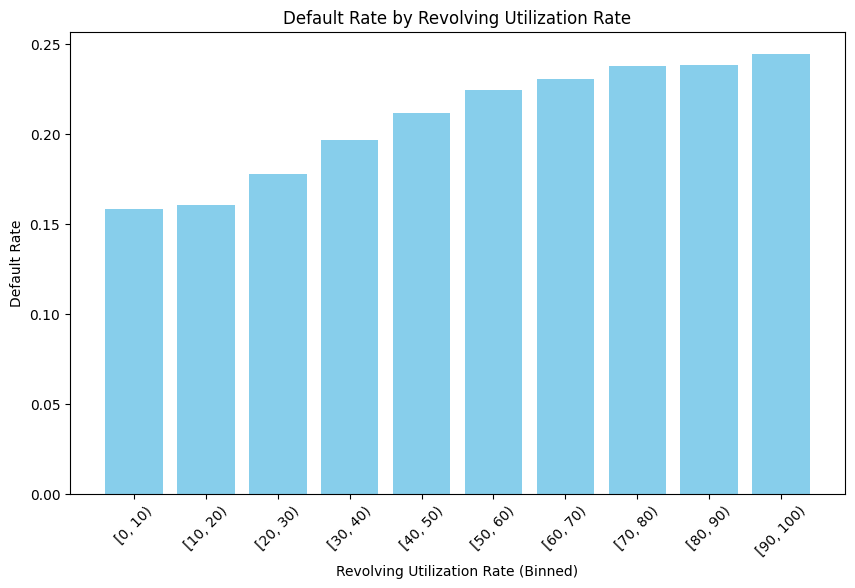

In [ ]:
# Plotting the default rate by revol_util_bin
plt.figure(figsize=(10, 6))
plt.bar(revol_default_df['revol_util_bin'].astype(str), revol_default_df['default_rate'], color='skyblue')
plt.xlabel('Revolving Utilization Rate (Binned)')
plt.ylabel('Default Rate')
plt.title('Default Rate by Revolving Utilization Rate')
plt.xticks(rotation=45)
plt.show()

###Issue Date (Houlton)

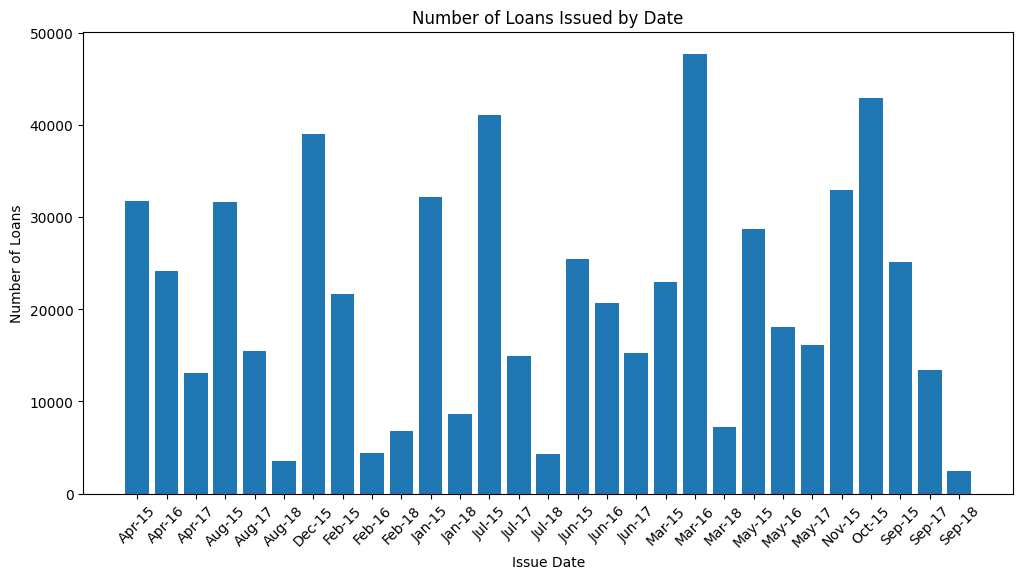

In [ ]:
# Create a bar chart for issue_d
issue_d_counts = df.groupby('issue_d')['loan_status_dummy'].count()

plt.figure(figsize=(12, 6))
plt.bar(issue_d_counts.index, issue_d_counts.values)
plt.xlabel('Issue Date')
plt.ylabel('Number of Loans')
plt.title('Number of Loans Issued by Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#3. Machine Learning Model

##3.1 OLS

###Predictors Selection

In [ ]:
predictor_names = [ 'Income_cat',
                    'DTI_cat',
                    'FICO_cat',
                    'funded_amnt',
                    'purpose',
                    'term',
                    'int_rate',
                    'installment',
                    'collections_12_mths_ex_med',
                    'application_type',
                    'emp_length',
                    'home_ownership',
                    'annual_inc',
                    'pub_rec',
                    'revol_bal',
                    'revol_util',
                    'inq_last_6mths',
                    'total_rev_hi_lim',
                    'acc_open_past_24mths',
                    'avg_cur_bal',
                    'bc_open_to_buy',
                    'mo_sin_old_il_acct',
                    'mo_sin_old_rev_tl_op',
                    'mo_sin_rcnt_tl',
                    'mort_acc',
                    'mths_since_recent_bc',
                    'mths_since_recent_inq',
                    'num_actv_rev_tl',
                    'num_bc_tl',
                    'num_rev_tl_bal_gt_0',
                    'num_sats',
                    'num_tl_120dpd_2m',
                    'num_tl_30dpd',
                    'num_tl_90g_dpd_24m',
                    'pct_tl_nvr_dlq',
                    'percent_bc_gt_75',
                    'total_bal_ex_mort',
                    'total_bc_limit',
                    'total_il_high_credit_limit'
]

###Convert Categories into Dummies

In [ ]:
predictor_df = df[predictor_names]
cat_predictors = predictor_df.select_dtypes(include=['object', 'category']).columns
print(cat_predictors)
predictors = pd.get_dummies(predictor_df, columns=cat_predictors, drop_first=True) #convert categorical to dummy
predictors.head()

Index(['Income_cat', 'DTI_cat', 'FICO_cat', 'purpose', 'term',
       'application_type', 'emp_length', 'home_ownership'],
      dtype='object')


,funded_amnt,int_rate,installment,collections_12_mths_ex_med,annual_inc,pub_rec,revol_bal,revol_util,inq_last_6mths,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_rev_tl,num_bc_tl,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,percent_bc_gt_75,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Income_cat_Medium Income,Income_cat_High Income,DTI_cat_Fair,DTI_cat_Bad,FICO_cat_Fair,FICO_cat_Good,FICO_cat_Very Good,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,application_type_Joint App,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT
0,18000,19.48,471.70,0,150000.0,1,14052,40.7,1,34500,7,2014.0,5128.0,115.0,112,1,2,9.0,2.0,13,8,13,18,0.0,0,0,100.0,14.3,36247,10300,31319,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1,4225,14.85,146.16,0,35000.0,0,1058,24.6,0,4300,0,815.0,2233.0,47.0,53,26,0,26.0,14.0,2,3,2,6,0.0,0,0,66.7,0.0,4888,2600,17522,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
2,16000,12.88,538.18,0,65000.0,1,5157,54.3,0,9500,2,5683.0,3684.0,256.0,360,1,0,1.0,14.0,5,3,5,7,0.0,0,0,80.0,0.0,39781,4700,71499,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
3,24250,24.24,701.01,0,75000.0,0,24799,65.3,0,38000,13,17783.0,9044.0,93.0,104,2,2,2.0,7.0,12,12,12,18,0.0,0,0,100.0,63.6,38475,29100,18300,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
4,25000,13.99,581.58,0,79000.0,0,22519,18.6,1,121200,12,8556.0,57049.0,124.0,174,1,6,2.0,2.0,16,21,16,33,0.0,0,0,100.0,0.0,89978,72600,81802,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False


###Impute Missing Values

In [ ]:
from sklearn.impute import SimpleImputer

# Check if there are any missing values
missing_values = predictors.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(f"Before: {missing_values}")

# Create a SimpleImputer for numerical variables using the median strategy
Imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputers to the respective columns
predictors[missing_values.index] = Imputer.fit_transform(predictors[missing_values.index])

# Check if there are any remaining missing values
missing_values = predictors.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(f"After: {missing_values}")

Before: revol_util                 326
avg_cur_bal                  5
bc_open_to_buy            6538
mo_sin_old_il_acct       17695
mths_since_recent_bc      6204
mths_since_recent_inq    60141
num_tl_120dpd_2m         28328
pct_tl_nvr_dlq               1
percent_bc_gt_75          6812
dtype: int64
After: Series([], dtype: int64)


###OLS Regression

In [ ]:
X = MS(predictors).fit_transform(predictors)
Y = df['loan_status_dummy']
ols_result = sm.OLS(Y, X).fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:      loan_status_dummy   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     1125.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        04:22:45   Log-Likelihood:            -2.8481e+05
No. Observations:              611802   AIC:                         5.698e+05
Df Residuals:                  611735   BIC:                         5.705e+05
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept           

###Predict and Classification

In [ ]:
# Predict probabilities
predicted_probabilities = ols_result.predict(X)

# Classify based on probability
predicted_classes = [1 if prob > 0.5 else 0 for prob in predicted_probabilities]

###Confusion Matrix and Accurate Rate

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming you have your true labels in 'Y' and predicted labels in 'predicted_classes'
# Calculate the confusion matrix
cm = confusion_matrix(Y, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy rate
accuracy = accuracy_score(Y, predicted_classes)

# Print the accuracy rate
print("Prediction Accuracy Rate:", accuracy)

Confusion Matrix:
[[474881   7713]
 [119068  10140]]
Prediction Accuracy Rate: 0.7927744597108215


##3.2 Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Fit the model
logreg_model.fit(X, Y)

# Predict the classes
logreg_predicted_classes = logreg_model.predict(X)

# Print the coefficients of the logistic regression model
print("Logistic Regression Coefficients:")
for feature, coefficient in zip(predictors.columns, logreg_model.coef_[0]):
  print(f"{feature}: {coefficient}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Coefficients:
funded_amnt: -9.406599266820648e-05
int_rate: 0.00010735448031347162
installment: 0.0041324631350228
collections_12_mths_ex_med: -0.002295927365785294
annual_inc: 1.0633209649309819e-05
pub_rec: -3.6420500282157234e-06
revol_bal: 5.7980806224286e-05
revol_util: 3.7749962867811547e-06
inq_last_6mths: -0.0016656637450063341
total_rev_hi_lim: 0.00035800249919090677
acc_open_past_24mths: -5.8576434457497304e-06
avg_cur_bal: 0.0014549381415792663
bc_open_to_buy: -1.8932560103723965e-05
mo_sin_old_il_acct: -8.844996165094963e-06
mo_sin_old_rev_tl_op: -0.0010524346220576154
mo_sin_rcnt_tl: -0.000781332835954764
mort_acc: -0.0032248995684202564
mths_since_recent_bc: -0.00018042600757735432
mths_since_recent_inq: -0.006113976587936997
num_actv_rev_tl: -0.002018289948759289
num_bc_tl: 0.0008631972043158484
num_rev_tl_bal_gt_0: 0.00024783937661337587
num_sats: 0.0008089468091179376
num_tl_120dpd_2m: 0.00036377952817850826
num_tl_30dpd: 8.516711086009694e-07
num_t

###Confusion Matrix and Accurate Rate

In [ ]:
# Calculate the confusion matrix
logreg_cm = confusion_matrix(Y, logreg_predicted_classes)

# Print the confusion matrix
print("Logistic Regression Confusion Matrix:")
print(logreg_cm)

# Calculate the accuracy rate
logreg_accuracy = accuracy_score(Y, logreg_predicted_classes)

# Print the accuracy rate
print("Logistic Regression Prediction Accuracy Rate:", logreg_accuracy)

Logistic Regression Confusion Matrix:
[[481466   1128]
 [128285    923]]
Logistic Regression Prediction Accuracy Rate: 0.7884724142778219


###Validation Approach

In [ ]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model on the training data
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, Y_train)

# Make predictions on the test data
logreg_predicted_classes_test = logreg_model.predict(X_test)

# Evaluate the model on the test data
logreg_cm_test = confusion_matrix(Y_test, logreg_predicted_classes_test)
logreg_accuracy_test = accuracy_score(Y_test, logreg_predicted_classes_test)

print("Logistic Regression Confusion Matrix (Test Data):")
print(logreg_cm_test)
print("Logistic Regression Prediction Accuracy Rate (Test Data):", logreg_accuracy_test)

Logistic Regression Confusion Matrix (Test Data):
[[96520    94]
 [25657    90]]
Logistic Regression Prediction Accuracy Rate (Test Data): 0.789548957592697


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##3.3 Ridge Regression

###Standardized Predictors

In [ ]:
X_array = np.array(X)

X_scale = X_array.std(0)  # Calculate standard deviations of columns
zero_std_cols = np.where(X_scale == 0)[0]  # Find indices of columns with 0 std
print(f"Column(s) with 0 standard deviation: {zero_std_cols}")  # Display the indices
X_array = X_array[:, X_scale != 0]  # Keep only columns with non-zero standard deviation

# Update X_scale to reflect the removed column(s)
X_scale = X_scale[X_scale != 0]  # Remove the standard deviation(s) corresponding to the removed column(s)

Xs = X_array - X_array.mean(axis=0)[None, :]  # 0 means calculating along the column; None for making one more dimension to the data array
Xs = Xs / X_scale[None, :]  # Now X_scale has the correct shape for broadcasting
Xs

Column(s) with 0 standard deviation: [0]


array([[ 0.39072119,  1.41092047,  0.12284813, ..., -0.00180805,
        -0.35905912,  1.23026656],
       [-1.1732308 ,  0.44484712, -1.1132305 , ..., -0.00180805,
        -0.35905912,  1.23026656],
       [ 0.16365012,  0.03379648,  0.37527335, ..., -0.00180805,
        -0.35905912, -0.81283197],
       ...,
       [ 0.16365012, -0.410639  ,  0.31357194, ..., -0.00180805,
        -0.35905912, -0.81283197],
       [-0.97170523, -1.00739273, -0.95542676, ..., -0.00180805,
        -0.35905912, -0.81283197],
       [-1.5393829 , -1.29950994, -1.55182312, ..., -0.00180805,
        -0.35905912, -0.81283197]])

###K = 10. Pick the value of Lambda using RidgeCV

In [ ]:
from sklearn.linear_model import RidgeCV

lambdas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# Create and fit the RidgeCV model
ridge_cv_model = RidgeCV(alphas=lambdas, scoring='neg_mean_squared_error', cv=10)  # You can still specify cv here
ridge_cv_model.fit(Xs, Y)

# Get the best alpha value
best_alpha = ridge_cv_model.alpha_

# Get the coefficients
coefficients = ridge_cv_model.coef_

print(f"Best Lambda: {best_alpha}")
print("Coefficients of Ridge Regression with best lambda:")
for feature, coef in zip(X.columns, coefficients):
  print(f"{feature}: {coef}")

Best Lambda: 10000.0
Coefficients of Ridge Regression with best lambda:
intercept: -0.007067382610996146
funded_amnt: 0.0643021737696877
int_rate: 0.027845875643210664
installment: 0.0036555787830903973
collections_12_mths_ex_med: -0.0009891346434071282
annual_inc: 0.0020901009938716205
pub_rec: -2.710021606766497e-05
revol_bal: 0.004568944235175552
revol_util: 0.00970213545856756
inq_last_6mths: -0.006159088302704666
total_rev_hi_lim: 0.021276567342129595
acc_open_past_24mths: -0.008008652728041523
avg_cur_bal: 0.006586870060220692
bc_open_to_buy: -0.0007072147831892993
mo_sin_old_il_acct: -0.002447073956687968
mo_sin_old_rev_tl_op: -0.0015443720492939361
mo_sin_rcnt_tl: -0.01315215417853771
mort_acc: -0.0036190754596852697
mths_since_recent_bc: -0.0018133573984465364
mths_since_recent_inq: 0.011137175755126589
num_actv_rev_tl: -0.004051759715925842
num_bc_tl: 0.011403493232275293
num_rev_tl_bal_gt_0: -0.009302109213555705
num_sats: 0.0013224274972039236
num_tl_120dpd_2m: 0.0012123481

###Confusion Matrix and Accuracy Score

In [ ]:
ridge_predicted_classes = ridge_cv_model.predict(Xs) > 0.5  # Assuming a threshold of 0.5 for classification

# Calculate the confusion matrix
ridge_cm = confusion_matrix(Y, ridge_predicted_classes)

# Print the confusion matrix
print("Ridge Regression Confusion Matrix:")
print(ridge_cm)

# Calculate the accuracy rate
ridge_accuracy = accuracy_score(Y, ridge_predicted_classes)

# Print the accuracy rate
print("Ridge Regression Prediction Accuracy Rate:", ridge_accuracy)

Ridge Regression Confusion Matrix:
[[475568   7026]
 [119774   9434]]
Ridge Regression Prediction Accuracy Rate: 0.792743403911723


##3.4 Lasso Regression

In [ ]:
from sklearn.linear_model import LassoCV

# Create and fit the LassoCV model with 5-fold cross-validation
lasso_cv_model = LassoCV(alphas=lambdas, cv=10, random_state=42)
lasso_cv_model.fit(Xs, Y)

# Get the best alpha (lambda) value
best_alpha_lasso = lasso_cv_model.alpha_

# Get the best alpha value
best_alpha = lasso_cv_model.alpha_

# Get the coefficients
coefficients = lasso_cv_model.coef_

print(f"Best Lambda: {best_alpha}")
print("Coefficients of Lasso Regression with best lambda:")
for feature, coef in zip(X.columns, coefficients):
  print(f"{feature}: {coef}")

Best Lambda: 0.001
Coefficients of Lasso Regression with best lambda:
intercept: 0.0
funded_amnt: 0.06989167634788425
int_rate: 0.017773429674985106
installment: 0.0027638693420359243
collections_12_mths_ex_med: -0.0003694940576866436
annual_inc: 0.0011192972943537018
pub_rec: -0.0
revol_bal: 0.002322278268249338
revol_util: 0.009035978331987623
inq_last_6mths: -0.0035368792330059944
total_rev_hi_lim: 0.019606443669168316
acc_open_past_24mths: -0.007696592663452977
avg_cur_bal: 0.0
bc_open_to_buy: -0.0
mo_sin_old_il_acct: -0.0007411733240892574
mo_sin_old_rev_tl_op: -0.0005953201489212837
mo_sin_rcnt_tl: -0.013090720176662069
mort_acc: -0.0027845861501326866
mths_since_recent_bc: -0.0008158365849056818
mths_since_recent_inq: 0.007921879304544625
num_actv_rev_tl: -0.0021563486491659087
num_bc_tl: 0.011584703348649129
num_rev_tl_bal_gt_0: -0.006731427807511788
num_sats: 0.00033023617046810537
num_tl_120dpd_2m: 4.2839205206660354e-05
num_tl_30dpd: 0.001057607912110321
num_tl_90g_dpd_24m: 

###Coefficients that are 0

In [ ]:
# Find coefficients that are 0
zero_coef_features = [feature for feature, coef in zip(X.columns, coefficients) if coef == 0]

print("Features with 0 coefficients in Lasso Regression:")
zero_coef_features

Features with 0 coefficients in Lasso Regression:


['intercept',
 'pub_rec',
 'avg_cur_bal',
 'bc_open_to_buy',
 'percent_bc_gt_75',
 'total_il_high_credit_limit',
 'FICO_cat_Fair',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_moving',
 'purpose_small_business',
 'purpose_vacation',
 'home_ownership_MORTGAGE',
 'home_ownership_NONE']

###Confusion Matrix and Accuracy Score

In [ ]:
lasso_predicted_classes = lasso_cv_model.predict(Xs) > 0.5  # Assuming a threshold of 0.5 for classification

# Calculate the confusion matrix
lasso_cm = confusion_matrix(Y, lasso_predicted_classes)

# Print the confusion matrix
print("Lasso Regression Confusion Matrix:")
print(lasso_cm)

# Calculate the accuracy rate
lasso_accuracy = accuracy_score(Y, lasso_predicted_classes)

# Print the accuracy rate
print("Lasso Regression Prediction Accuracy Rate:", lasso_accuracy)

Lasso Regression Confusion Matrix:
[[475672   6922]
 [120116   9092]]
Lasso Regression Prediction Accuracy Rate: 0.792354389165122


##3.5 Compare Accuracy Rates

In [ ]:
accuracy_rates = {
    "OLS": accuracy,
    "Logistic Regression": logreg_accuracy,
    "Ridge Regression": ridge_accuracy,
    "Lasso Regression": lasso_accuracy
}

highest_accuracy = 0
best_regression = ""

for regression, accuracy_rate in accuracy_rates.items():
  print(f"{regression} Accuracy Rate: {accuracy_rate}")
  if accuracy_rate > highest_accuracy:
    highest_accuracy = accuracy_rate
    best_regression = regression

print(f"The highest accuracy is {highest_accuracy} and the best regression is {best_regression}")

OLS Accuracy Rate: 0.7927744597108215
Logistic Regression Accuracy Rate: 0.7884724142778219
Ridge Regression Accuracy Rate: 0.792743403911723
Lasso Regression Accuracy Rate: 0.792354389165122
The highest accuracy is 0.7927744597108215 and the best regression is OLS


OLS has the best Accuracy Rate on the training dataset because Ridge and Lasso shrink Beta hat to avoid overfitting issue. If considering predicting performance, Ridge and Lasso would do best.